# CAS ADS - Presentation Module 2
## Confidence degree quizz
Confidence degree quizzes are educational tools used to assess not only knowledge but also an individual's confidence in their answers. Participants answer questions and then rate their confidence in their responses, often on a scale from 0 to 100%. This approach evaluates both the accuracy of answers and the individual's ability to gauge their own knowledge. These quizzes encourage metacognition, helping individuals reflect on their thinking and identify areas where they might be overconfident or underestimate their knowledge. They are particularly useful in educational or professional settings to target areas for improvement.

First-year bachelor students take quizzes during their mathematics didactics course. They complete one quiz before the test and another after the test. Each quiz consists of 20 questions, with each question either awarding or deducting 20 points. The possible score range for the quiz is from -400 to +400 points.

## Dataset

The dataset is a csv file with the following structure:
- userid: number - id of the student
- attempt: number - Current attempt for this test
- done: number - 0|1 wether the student has finished the test or not
- points: number - Points obtained from -400 to +400
- test: string - the name of the test
- created: date - date at witch the student took the test





## 1. Setup

Import the necessary packages:

In [1]:
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import norm
import statsmodels.api as sm
from scipy import stats
from scipy.stats import normaltest


First, get the data from the server:

In [ ]:
url = "https://static.grosjean.io/cas/confidence_degree.csv"
df = pd.read_csv(url, sep=",")
df.head()

,userid,attempt,done,points,test,created
0,2298,1,0,0,Pré-test Numération,Thu Mar 21 2024 17:48:19 GMT+0000 (Coordinated...
1,2107,1,1,-10,Pré-test Numération,Thu Mar 21 2024 18:44:52 GMT+0000 (Coordinated...
2,2179,1,1,126,Pré-test Numération,Thu Mar 21 2024 20:05:28 GMT+0000 (Coordinated...
3,2199,1,1,180,Pré-test Numération,Thu Mar 21 2024 20:13:26 GMT+0000 (Coordinated...
4,2174,1,1,234,Pré-test Numération,Fri Mar 22 2024 08:25:27 GMT+0000 (Coordinated...


## 2. Cleaning

We only keep test quizz that are:
- done=1: quizz that are not finished does not have a grade
- attempt=1: Students may take the quizz test several times. We only keep the first attempt so we only have unpaired result

For reminder, Paired/related data
Repeated measurements on the same object/individual, e.g. before and after treatment
Unpaired/independent data

Independent, e.g. from separate individuals

In [ ]:
# we get only the finished quizz
df = df[df["done"] == 1]

# we only keep the first attempt in order to have an unpaired datased
df = df[df["attempt"] == 1]

df.head()

,userid,attempt,done,points,test,created
1,2107,1,1,-10,Pré-test Numération,Thu Mar 21 2024 18:44:52 GMT+0000 (Coordinated...
2,2179,1,1,126,Pré-test Numération,Thu Mar 21 2024 20:05:28 GMT+0000 (Coordinated...
3,2199,1,1,180,Pré-test Numération,Thu Mar 21 2024 20:13:26 GMT+0000 (Coordinated...
4,2174,1,1,234,Pré-test Numération,Fri Mar 22 2024 08:25:27 GMT+0000 (Coordinated...
5,2097,1,1,223,Pré-test Numération,Fri Mar 22 2024 09:08:37 GMT+0000 (Coordinated...


## 3. Display some informations

Let see some data about our dataset:

In [ ]:
# number of rows
print(f"Number of rows: {len(df)}\n")

# number of unique users
print(f"Number of unique students: {len(df['userid'].unique())}\n")

# print all the differents tests
print(f"All the differents tests:")
print(df['test'].unique())

Number of rows: 7253

Number of unique students: 1215

All the differents tests:
['Pré-test Numération' 'Pré-test Nombres et opérations'
 'Pré-test Ensembles et logique' 'Pré-test Algorithmes et opérations'
 'Post-test Numération' 'Post-test Nombres et opérations'
 'Post-test Ensembles et logique' 'Post-test Algorithmes et opérations']


# 4. Creating the two samples

We want to group them into 2 groups.
- The group "Pré-test" that has taken the confidence degree quizz before taking the real test.
- The group "Post-test" that has taken the confidence degree quizz after taking the real test.

In [ ]:
pre_test = df[df["test"].str.startswith("Pré")]
pre_test_mean = pre_test['points'].mean()
pre_test_std = pre_test['points'].std()

print(f"The pre_test group has {len(pre_test)} rows")
print(f"pre_test mean: {pre_test_mean}, std: {pre_test_std}")
pre_test.head()


The pre_test group has 3588 rows
pre_test mean: 206.79319955406913, std: 82.03951082565132


,userid,attempt,done,points,test,created
1,2107,1,1,-10,Pré-test Numération,Thu Mar 21 2024 18:44:52 GMT+0000 (Coordinated...
2,2179,1,1,126,Pré-test Numération,Thu Mar 21 2024 20:05:28 GMT+0000 (Coordinated...
3,2199,1,1,180,Pré-test Numération,Thu Mar 21 2024 20:13:26 GMT+0000 (Coordinated...
4,2174,1,1,234,Pré-test Numération,Fri Mar 22 2024 08:25:27 GMT+0000 (Coordinated...
5,2097,1,1,223,Pré-test Numération,Fri Mar 22 2024 09:08:37 GMT+0000 (Coordinated...


In [ ]:
post_test = df[df["test"].str.startswith("Post")]
post_test_mean = post_test['points'].mean()
post_test_std = post_test['points'].std()

print(f"The post_test group has {len(post_test)} rows")
print(f"post_test mean: {post_test_mean}, std: {post_test_std}")
post_test.head()

The post_test group has 3665 rows
post_test mean: 234.30040927694407, std: 70.5083697093349


,userid,attempt,done,points,test,created
7034,2277,1,1,84,Post-test Numération,Fri Apr 26 2024 09:16:24 GMT+0000 (Coordinated...
7035,2267,1,1,304,Post-test Numération,Fri Apr 26 2024 11:25:19 GMT+0000 (Coordinated...
7036,2104,1,1,264,Post-test Numération,Fri Apr 26 2024 11:29:24 GMT+0000 (Coordinated...
7037,2107,1,1,161,Post-test Numération,Fri Apr 26 2024 11:51:03 GMT+0000 (Coordinated...
7038,2137,1,1,121,Post-test Numération,Fri Apr 26 2024 12:42:58 GMT+0000 (Coordinated...


## 5. Plot the two samples

We're now going to plot the samples and their bell curve.

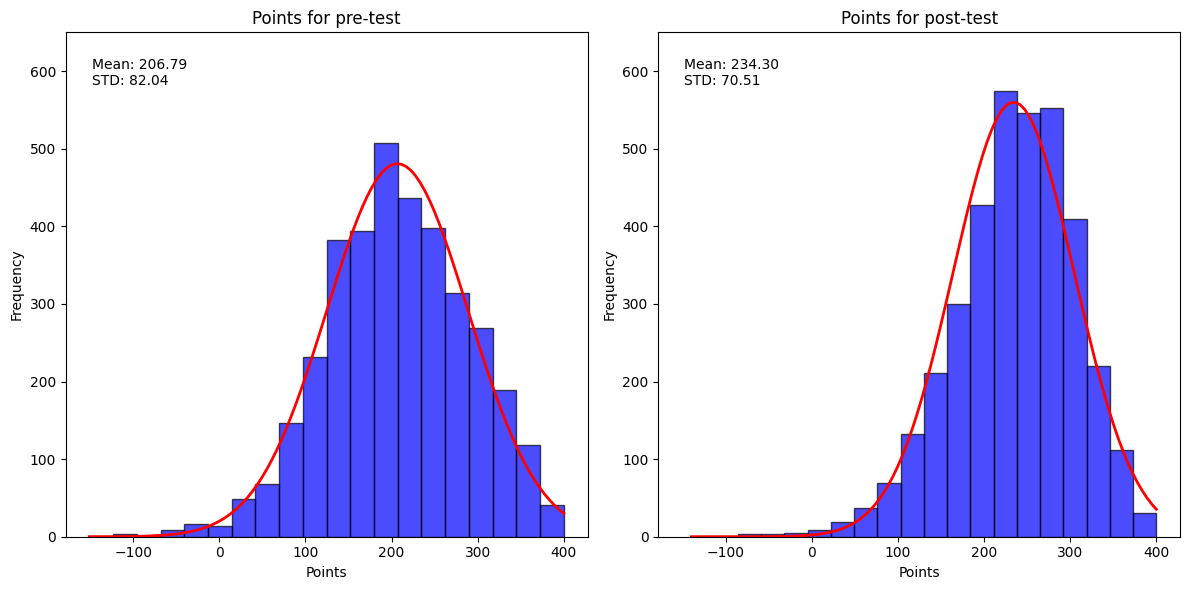

In [ ]:
# we plot here the histogram for both pre and post test and the normal bell curve

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6), sharex=True, tight_layout=True)

# Plot the histogram for the pre-test
pre_test['points'].plot(kind='hist', ax=ax1, density=False, color='blue', edgecolor='black', alpha=0.7, bins=20)
ax1.set_ylim(0, 650)
ax1.set_title('Points for pre-test')
ax1.set_xlabel('Points')
ax1.set_ylabel('Frequency')

# Plot the norm pdf for pre_test
x_pre = np.linspace(pre_test['points'].min(), pre_test['points'].max(), 100)
pdf_pre = norm.pdf(x_pre, pre_test_mean, pre_test_std)
ax1.plot(x_pre, pdf_pre * len(pre_test['points']) * (pre_test['points'].max() - pre_test['points'].min()) / 20, 'r', linewidth=2)

# Print std and mean
ax1.text(0.05, 0.95, f'Mean: {pre_test_mean:.2f}\nSTD: {pre_test_std:.2f}',
         transform=ax1.transAxes, fontsize=10, verticalalignment='top')

# Plot the histogram for the post-test
post_test['points'].plot(kind='hist', ax=ax2, density=False, color='blue', edgecolor='black', alpha=0.7, bins=20)
ax2.set_ylim(0, 650)
ax2.set_title('Points for post-test')
ax2.set_xlabel('Points')
ax2.set_ylabel('Frequency')

# Plot the norm pdf for post_test
x_post = np.linspace(post_test['points'].min(), post_test['points'].max(), 100)
pdf_post = norm.pdf(x_post, post_test_mean, post_test_std)
ax2.plot(x_post, pdf_post * len(post_test['points']) * (post_test['points'].max() - post_test['points'].min()) / 20, 'r', linewidth=2)

# Print std and mean
ax2.text(0.05, 0.95, f'Mean: {post_test_mean:.2f}\nSTD: {post_test_std:.2f}',
         transform=ax2.transAxes, fontsize=10, verticalalignment='top')

plt.tight_layout()
plt.show()


Theirs Mean and STD are different.

They look they fit in a standard distribution.

They lire slightly skewed to the right.

## 6. Test for normality

Now let's plot a q-q plot to see if they indeed fall under a standard distribution

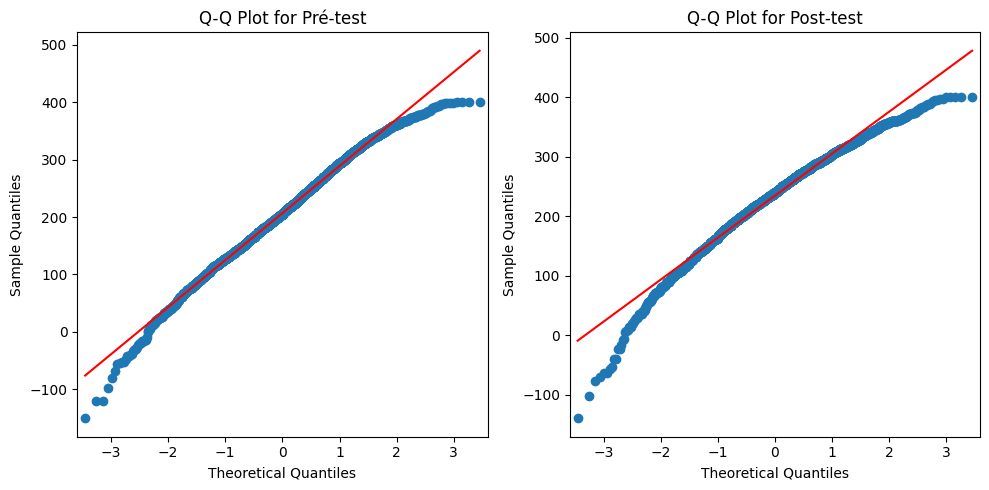

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

sm.qqplot(pre_test['points'], line='s', ax=axs[0])
axs[0].set_title('Q-Q Plot for Pré-test')

sm.qqplot(post_test['points'], line='s', ax=axs[1])
axs[1].set_title('Q-Q Plot for Post-test')

plt.tight_layout()
plt.show()

The tails seem to differ from a normal distribution.

Is it normally distributed ? Well I don't really now...

Let's take a normality test to see if they are normal.

In [ ]:
# Rejection criterion
# I ask chatgpt for why alpha should be 0.001 and it said that 0.001 is a common value
# so let's take it
alpha = 0.001

In [ ]:
# D Agostino-Pearson test for pre-test
k2, p_pre = stats.normaltest(pre_test['points'])
print(f"Normality test for pre_test:")
print(f"alpha: {alpha}")
print(f"p-value = {p_pre}")

if p_pre < alpha:
     print("The null hypothesis can be rejected")
else:
  print("The null hypothesis cannot be rejected")

Normality test for pre_test:
alpha: 0.001
p-value = 9.83162084926032e-06
The null hypothesis can be rejected


In [ ]:
# D Agostino-Pearson test for post-test
k2, p_post = stats.normaltest(post_test['points'])
print(f"p-value = {p_post}")

if p_post < alpha:
     print("The null hypothesis can be rejected")
else:
  print("The null hypothesis cannot be rejected")

p-value = 3.9722554291111684e-55
The null hypothesis can be rejected


For both cases, the null hypothesis can be rejected.

It means that our data does not follow a normal distribution.

Dang... The data is not suitable to perform a welch t-test...

## 7. Test
### 7.1 Unpaired t-test with Welsch's correction

The exercise ask that we perform a welsch t-test. It requires the following:
- 2 samples
- normally distributed
- unpaired
- not equal Standard Deviation

However, out tests so far show the following:
- 2 samples
- not normally distributed
- unpaired
- not equal Standard Deviation

Our data are not normally distributed so using the welch t-test is not suitable.

We'll do it anyway and do the proper test later.

In [ ]:
stats.ttest_ind(pre_test["points"], post_test["points"], alternative='two-sided')
print(f"t-statistic: {result.statistic}")
print(f"p-value: {result.pvalue}")

t-statistic: -15.324432770228137
p-value: 3.431851160940055e-52


### 7.2 Mann-Whitney U test



In [ ]:
stats.mannwhitneyu(pre_test["points"], post_test["points"], alternative='two-sided')
print(f"t-statistic: {result.statistic}")
print(f"p-value: {result.pvalue}")

t-statistic: -15.324432770228137
p-value: 3.431851160940055e-52


### 7.3
Given that the p-value of both test is less than 0.05, we reject the null hypothesis. This indicates a statistically significant difference between the distributions of scores on the confidence quiz taken before (pre-test) and after (post-test) the actual test.

